In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("D:/Ebac/Trabajos Cientifico de Datos")
df = pd.read_csv("M30 Online Retail.csv", encoding='ISO-8859-1')

In [46]:
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [51]:
df.describe()

,QUANTITY,UNIT_PRICE,CUSTOMER_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [53]:
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()
df

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2020 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2020 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2020 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2020 12:50,4.15,12680.0,France


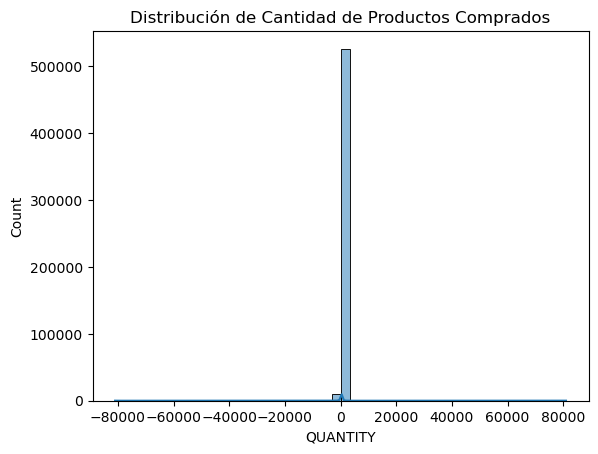

In [55]:
sns.histplot(df['QUANTITY'], bins=50, kde=True)
plt.title('Distribución de Cantidad de Productos Comprados')
plt.show()

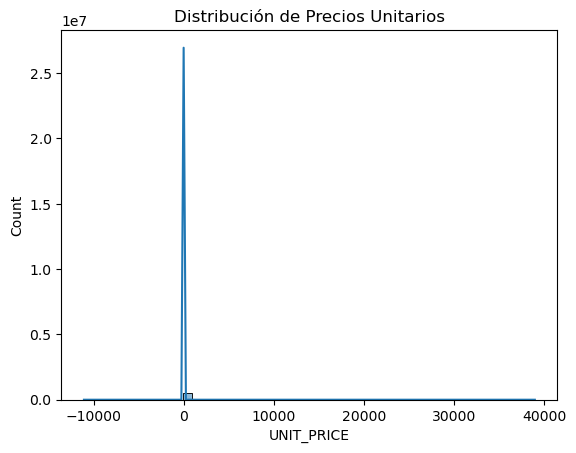

In [57]:
sns.histplot(df['UNIT_PRICE'], bins=50, kde=True)
plt.title('Distribución de Precios Unitarios')
plt.show()

In [59]:
df.loc[:, 'INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format='%d/%m/%Y %H:%M')

In [60]:
df.loc[:, 'INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], errors='coerce')

In [61]:
problematic_dates = df[df['INVOICE_DATE'].isna()]['INVOICE_DATE']
print(problematic_dates.head(10))

Series([], Name: INVOICE_DATE, dtype: object)


In [62]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'])
print(f"Primera transacción: {df['INVOICE_DATE'].min()}")
print(f"Última transacción: {df['INVOICE_DATE'].max()}")

Primera transacción: 2019-12-01 08:26:00
Última transacción: 2020-12-09 12:50:00


In [271]:
cliente_compras = df.groupby('CUSTOMER_ID').agg({'INVOICE_NO': 'nunique'}).reset_index()
cliente_compras.columns = ['CUSTOMER_ID', 'Num_Compras']
cliente_compras = cliente_compras.sort_values(by='Num_Compras', ascending=False)
cliente_compras.head(10)

,CUSTOMER_ID,Num_Compras
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


In [269]:
productos_vendidos = df.groupby('DESCRIPTION').agg({'QUANTITY': 'sum'}).reset_index()
productos_vendidos = productos_vendidos.sort_values(by='QUANTITY', ascending=False)
productos_vendidos.head(10)

,DESCRIPTION,QUANTITY
4002,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1863,JUMBO BAG RED RETROSPOT,47260
2736,POPCORN HOLDER,36322
244,ASSORTED COLOUR BIRD ORNAMENT,36282
2391,PACK OF 72 RETROSPOT CAKE CASES,36016
3911,WHITE HANGING HEART T-LIGHT HOLDER,35298
2799,RABBIT NIGHT LIGHT,30631
2157,MINI PAINT SET VINTAGE,26437
2357,PACK OF 12 LONDON TISSUES,26299
2389,PACK OF 60 PINK PAISLEY CAKE CASES,24719


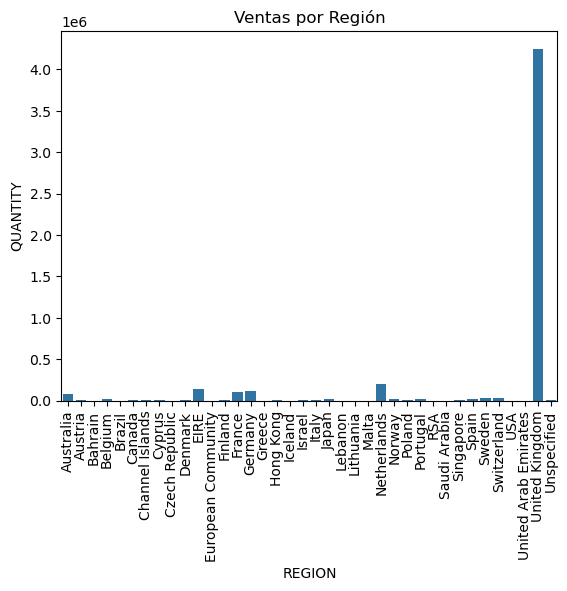

In [71]:
ventas_region = df.groupby('REGION').agg({'QUANTITY': 'sum'}).reset_index()
sns.barplot(data=ventas_region, x='REGION', y='QUANTITY')
plt.title('Ventas por Región')
plt.xticks(rotation=90)
plt.show()

In [265]:
fecha_maxima = df['INVOICE_DATE'].max()
ultima_compra = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max()
recencia = (fecha_maxima - ultima_compra).dt.days
recencia_df = pd.DataFrame({'CUSTOMER_ID': ultima_compra.index, 'Recencia': recencia})
recencia_df.head()

,CUSTOMER_ID,Recencia
CUSTOMER_ID,,
12346.0,12346.0,326
12347.0,12347.0,1
12348.0,12348.0,74
12349.0,12349.0,18
12350.0,12350.0,310


In [75]:
clientes_unicos = df['CUSTOMER_ID'].unique()
print(clientes_unicos[:10])

[17850. 13047. 12583. 13748. 15100. 15291. 14688. 17809. 15311. 14527.]


In [77]:
numero_clientes_unicos = df['CUSTOMER_ID'].nunique()
print(f"Total de clientes únicos: {numero_clientes_unicos}")

Total de clientes únicos: 4372


In [119]:
clientes_unicos_df = df.groupby('CUSTOMER_ID').agg({
    'INVOICE_DATE': 'max',
    'INVOICE_NO': 'nunique'
}).reset_index()
clientes_unicos_df.columns = ['CUSTOMER_ID', 'Ultima_Compra', 'Numero_Compras']
clientes_unicos_df.head()

,CUSTOMER_ID,Ultima_Compra,Numero_Compras
0,12346.0,2020-01-18 10:17:00,2
1,12347.0,2020-12-07 15:52:00,7
2,12348.0,2020-09-25 13:13:00,4
3,12349.0,2020-11-21 09:51:00,1
4,12350.0,2020-02-02 16:01:00,1


In [117]:
ultima_compra_por_cliente = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
ultima_compra_por_cliente.columns = ['CUSTOMER_ID', 'Ultima_Compra']
ultima_compra_por_cliente.head()

,CUSTOMER_ID,Ultima_Compra
0,12346.0,2020-01-18 10:17:00
1,12347.0,2020-12-07 15:52:00
2,12348.0,2020-09-25 13:13:00
3,12349.0,2020-11-21 09:51:00
4,12350.0,2020-02-02 16:01:00


In [115]:
fecha_maxima = df['INVOICE_DATE'].max()
ultima_compra_por_cliente = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
ultima_compra_por_cliente['Recency'] = (fecha_maxima - ultima_compra_por_cliente['INVOICE_DATE']).dt.days
ultima_compra_por_cliente = ultima_compra_por_cliente[['CUSTOMER_ID', 'Recency']]
ultima_compra_por_cliente.head()

,CUSTOMER_ID,Recency
0,12346.0,326
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,310


In [113]:
df_unido = pd.merge(clientes_unicos_df, ultima_compra_por_cliente, on='CUSTOMER_ID', how='left')
df_unido.head()

,CUSTOMER_ID,Ultima_Compra,Numero_Compras,Recency
0,12346.0,2020-01-18 10:17:00,2,326
1,12347.0,2020-12-07 15:52:00,7,1
2,12348.0,2020-09-25 13:13:00,4,74
3,12349.0,2020-11-21 09:51:00,1,18
4,12350.0,2020-02-02 16:01:00,1,310


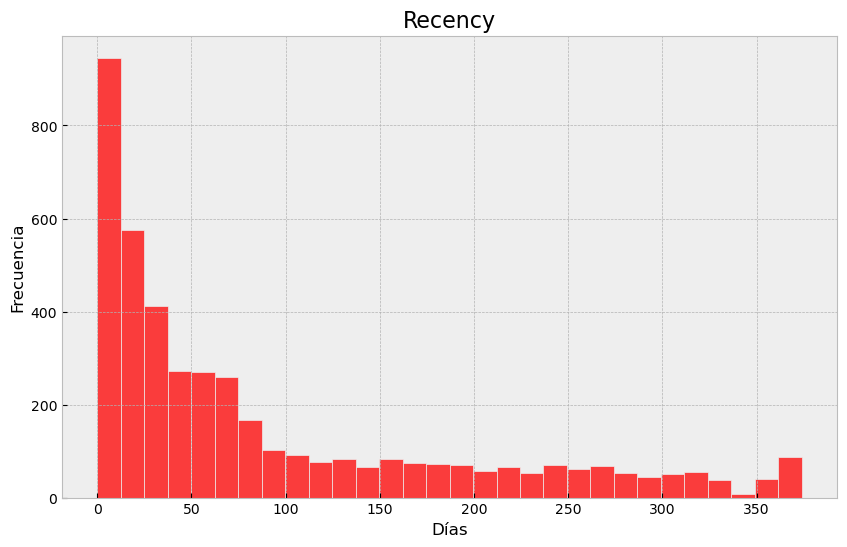

In [273]:
plt.figure(figsize=(10,6)) 
sns.histplot(df_unido['Recency'], bins=30, kde=False, color='red')
plt.title('Recency', fontsize=16)
plt.xlabel('Días', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [89]:
estadisticas_recency = df_unido['Recency'].describe()
print(estadisticas_recency)

count    4372.000000
mean       91.123056
std       100.946554
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64


In [111]:
frecuencia_compras = df.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frecuencia_compras.columns = ['CUSTOMER_ID', 'Frecuencia_Compras']
frecuencia_compras.head()

,CUSTOMER_ID,Frecuencia_Compras
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


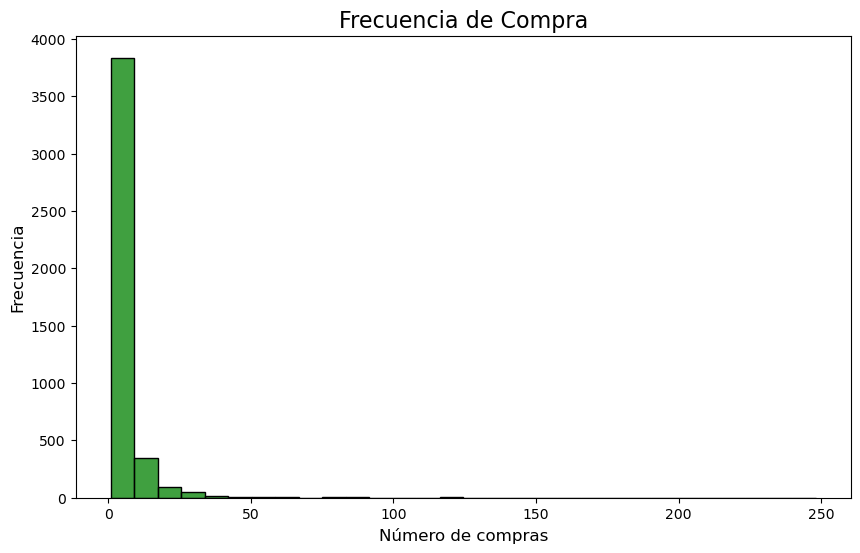

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(frecuencia_compras['Frecuencia_Compras'], bins=30, kde=False, color='green')
plt.title('Frecuencia de Compra', fontsize=16)
plt.xlabel('Número de compras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [127]:
estadisticas_frequency = df_final['Numero_Compras'].describe()
print(estadisticas_frequency)

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: Numero_Compras_y, dtype: float64


In [143]:
df['TOTAL_SPENT'] = df['QUANTITY'] * df['UNIT_PRICE']
gasto_por_cliente = df.groupby('CUSTOMER_ID')['TOTAL_SPENT'].sum().reset_index()
gasto_por_cliente.columns = ['CUSTOMER_ID', 'Monto_Total_Gastado']
gasto_por_cliente.head()

,CUSTOMER_ID,Monto_Total_Gastado
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [141]:
df['TOTAL_PER_PURCHASE'] = df['QUANTITY'] * df['UNIT_PRICE']
df[['INVOICE_NO', 'CUSTOMER_ID', 'TOTAL_PER_PURCHASE']].head()

,INVOICE_NO,CUSTOMER_ID,TOTAL_PER_PURCHASE
0,536365,17850.0,15.30
1,536365,17850.0,20.34
2,536365,17850.0,22.00
3,536365,17850.0,20.34
4,536365,17850.0,20.34


In [139]:
gasto_total_cliente = df.groupby('CUSTOMER_ID')['TOTAL_PER_PURCHASE'].sum().reset_index()
gasto_total_cliente.columns = ['CUSTOMER_ID', 'Valor_Total_Compras']
gasto_total_cliente.head()

,CUSTOMER_ID,Valor_Total_Compras
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [137]:
df_final = pd.merge(df_unido, gasto_total_cliente, on='CUSTOMER_ID', how='left')
df_final.head()

,CUSTOMER_ID,Ultima_Compra,Numero_Compras,Recency,Valor_Total_Compras
0,12346.0,2020-01-18 10:17:00,2,326,0.00
1,12347.0,2020-12-07 15:52:00,7,1,4310.00
2,12348.0,2020-09-25 13:13:00,4,74,1797.24
3,12349.0,2020-11-21 09:51:00,1,18,1757.55
4,12350.0,2020-02-02 16:01:00,1,310,334.40


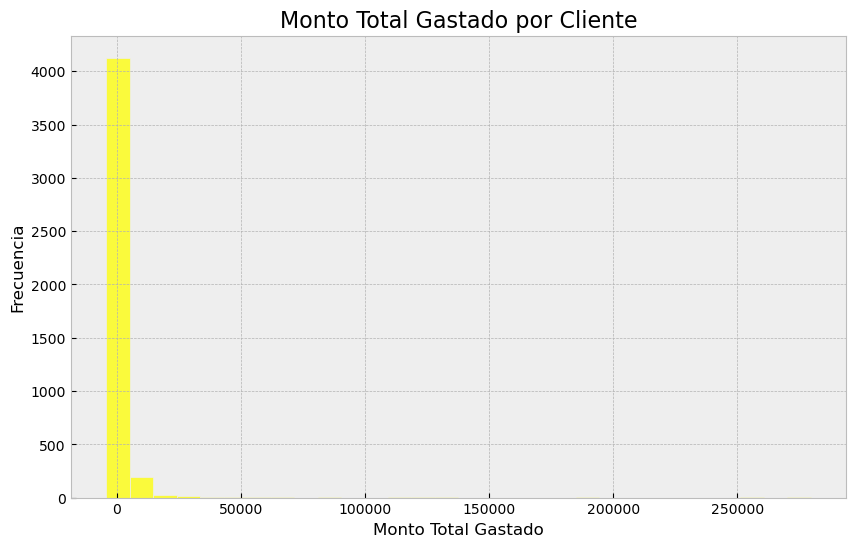

In [267]:
plt.figure(figsize=(10,6))
sns.histplot(df_final['Valor_Total_Compras'], bins=30, kde=False, color='yellow')
plt.title('Monto Total Gastado por Cliente', fontsize=16)
plt.xlabel('Monto Total Gastado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [149]:
estadisticas_monitary = df_final['Valor_Total_Compras'].describe()
print(estadisticas_monitary)

count      4372.000000
mean       1893.531433
std        8218.696204
min       -4287.630000
25%         291.795000
50%         644.070000
75%        1608.335000
max      279489.020000
Name: Valor_Total_Compras, dtype: float64


In [275]:
rfm_data = df_final[['Recency', 'Numero_Compras', 'Valor_Total_Compras']]
rfm_data.head()

,Recency,Numero_Compras,Valor_Total_Compras
0,326,2,0.00
1,1,7,4310.00
2,74,4,1797.24
3,18,1,1757.55
4,310,1,334.40


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

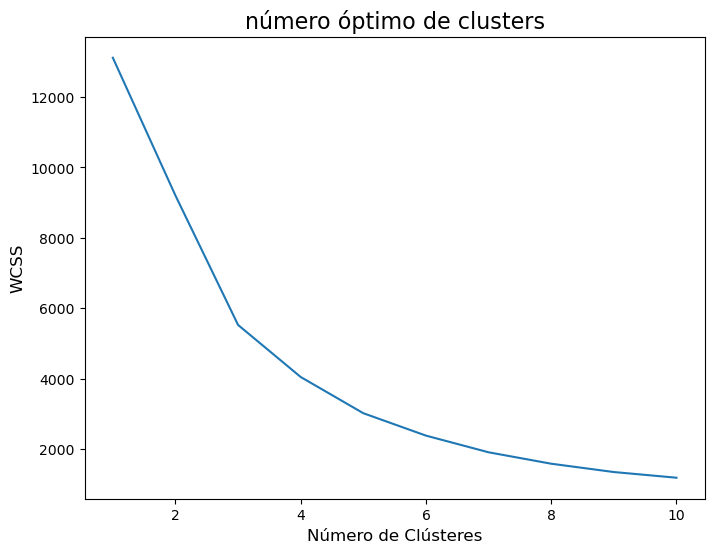

In [175]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('número óptimo de clusters', fontsize=16)
plt.xlabel('Número de Clústeres', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()

In [177]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_final['Cluster'] = kmeans.fit_predict(rfm_scaled)
df_final[['CUSTOMER_ID', 'Recency', 'Numero_Compras', 'Valor_Total_Compras', 'Cluster']].head()

,CUSTOMER_ID,Recency,Numero_Compras,Valor_Total_Compras,Cluster
0,12346.0,326,2,0.00,0
1,12347.0,1,7,4310.00,2
2,12348.0,74,4,1797.24,2
3,12349.0,18,1,1757.55,2
4,12350.0,310,1,334.40,0


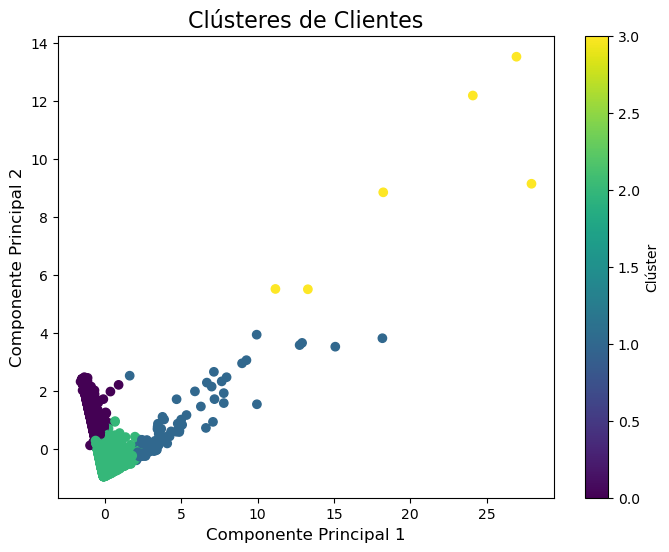

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
plt.figure(figsize=(8,6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=df_final['Cluster'], cmap='viridis')
plt.title('Clústeres de Clientes', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.colorbar(label='Clúster')
plt.show()

In [281]:
from sklearn.cluster import KMeans
X_recency = df_final[['Recency']]
kmeans_recency = KMeans(n_clusters=4, random_state=42)
df_final['Cluster_Recency'] = kmeans_recency.fit_predict(X_recency)
df_final[['CUSTOMER_ID', 'Recency', 'Cluster_Recency']].head()

,CUSTOMER_ID,Recency,Cluster_Recency
0,12346.0,326,1
1,12347.0,1,0
2,12348.0,74,3
3,12349.0,18,0
4,12350.0,310,1


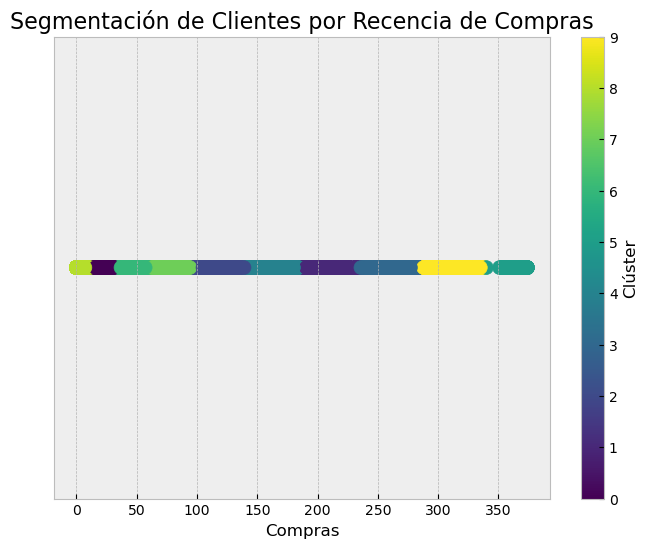

In [305]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['Recency'], [1] * len(df_final), c=df_final['Cluster_Recency'], cmap='viridis', s=100)
plt.title('Segmentación de Clientes por Recencia de Compras', fontsize=16)
plt.xlabel('Compras', fontsize=12)
plt.yticks([])
plt.colorbar(label='Clúster')
plt.show()

In [291]:
predicciones_recency = kmeans_recency.predict(X_recency)
df_final['Predicciones_Recency'] = predicciones_recency
df_final[['CUSTOMER_ID', 'Recency', 'Predicciones_Recency']].head()

,CUSTOMER_ID,Recency,Predicciones_Recency
0,12346.0,326,1
1,12347.0,1,0
2,12348.0,74,3
3,12349.0,18,0
4,12350.0,310,1


In [303]:
df_final['Cluster_Recency'] = kmeans.labels_
cluster_stats = df_final.groupby('Cluster_Recency')['Recency'].describe()
print(cluster_stats)

                 count        mean        std    min     25%    50%    75%  \
Cluster_Recency                                                              
0                892.0   22.755605   5.871685   14.0   17.00   22.0   28.0   
1                244.0  210.147541  14.384589  187.0  197.75  211.0  219.0   
2                282.0  116.996454  11.945159   97.0  106.25  116.0  127.0   
3                251.0  259.896414  14.016463  236.0  247.50  261.0  272.0   
4                287.0  162.975610  13.745543  140.0  151.00  164.0  174.5   
5                129.0  365.108527   6.823947  340.0  360.00  366.0  372.0   
6                611.0   47.212766   7.775786   35.0   40.00   48.0   53.0   
7                515.0   75.904854   9.801566   62.0   67.00   74.0   84.0   
8                963.0    5.240914   3.762451    0.0    2.00    4.0    8.0   
9                198.0  311.772727  14.488009  286.0  301.00  312.0  323.0   

                   max  
Cluster_Recency         
0            

In [293]:
cluster_ordenado_recency = df_final.groupby('Cluster_Recency').agg({
    'Recency': 'mean',
    'CUSTOMER_ID': 'count'
}).reset_index()
cluster_ordenado_recency = cluster_ordenado_recency.sort_values(by='Recency', ascending=True)
print(cluster_ordenado_recency)

   Cluster_Recency     Recency  CUSTOMER_ID
0                0   17.397311         2157
3                3   77.967985         1062
2                2  186.858934          638
1                1  308.438835          515


In [181]:
frequency_data = df_final[['Numero_Compras']]
scaler = StandardScaler()
frequency_scaled = scaler.fit_transform(frequency_data)

In [185]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_final['Cluster_Frequency'] = kmeans.fit_predict(frequency_scaled)
df_final[['CUSTOMER_ID', 'Numero_Compras', 'Cluster_Frequency']].head()

,CUSTOMER_ID,Numero_Compras,Cluster_Frequency
0,12346.0,2,0
1,12347.0,7,0
2,12348.0,4,0
3,12349.0,1,0
4,12350.0,1,0


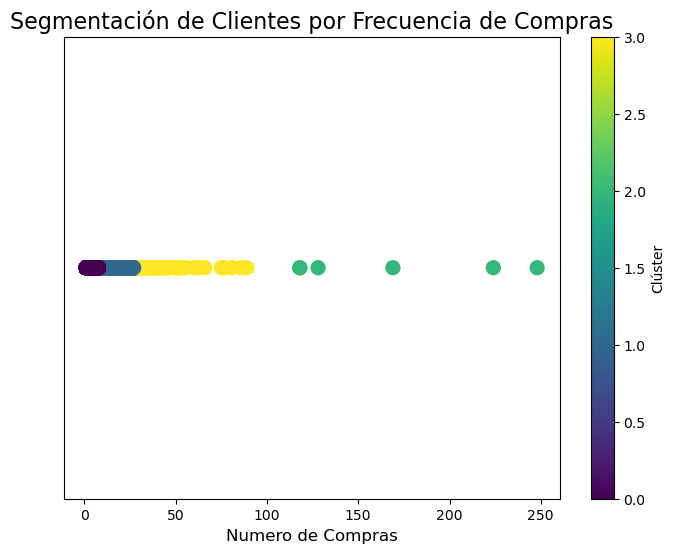

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['Numero_Compras'], [1] * len(df_final), c=df_final['Cluster_Frequency'], cmap='viridis', s=100)
plt.title('Segmentación de Clientes por Frecuencia de Compras', fontsize=16)
plt.xlabel('Numero de Compras', fontsize=12)
plt.yticks([])
plt.colorbar(label='Clúster')
plt.show()

In [299]:
monetary_data = df_final[['Valor_Total_Compras']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
monetary_scaled = scaler.fit_transform(monetary_data)
monetary_scaled

array([[-0.23041952],
       [ 0.29405454],
       [-0.01171748],
       ...,
       [-0.20892947],
       [ 0.01849636],
       [-0.00684511]])

In [193]:
from sklearn.cluster import KMeans
kmeans_monetary = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_final['Cluster_Monetary'] = kmeans_monetary.fit_predict(monetary_scaled)
df_final[['CUSTOMER_ID', 'Valor_Total_Compras', 'Cluster_Monetary']].head()

,CUSTOMER_ID,Valor_Total_Compras,Cluster_Monetary
0,12346.0,0.00,0
1,12347.0,4310.00,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0


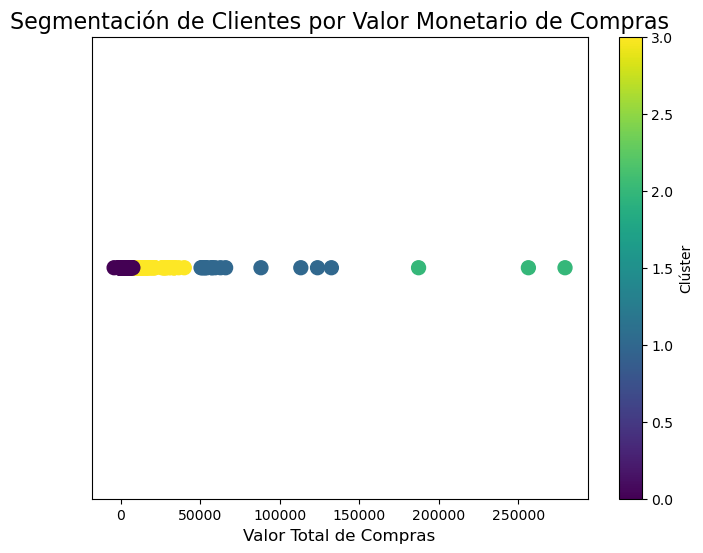

In [195]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['Valor_Total_Compras'], [1] * len(df_final), c=df_final['Cluster_Monetary'], cmap='viridis', s=100)
plt.title('Segmentación de Clientes por Valor Monetario de Compras', fontsize=16)
plt.xlabel('Valor Total de Compras', fontsize=12)
plt.yticks([])
plt.colorbar(label='Clúster')
plt.show()

In [197]:
cluster_scores = df_final.groupby('Cluster_Frequency')[['Recency', 'Numero_Compras', 'Valor_Total_Compras']].mean()
print(cluster_scores)

                      Recency  Numero_Compras  Valor_Total_Compras
Cluster_Frequency                                                 
0                  102.806391        2.816511           856.173567
1                   21.748614       14.036969          4835.863161
2                    0.500000      167.500000         54828.835000
3                    8.328571       43.071429         30263.038571


In [199]:
weights = {'Recency': -1, 'Numero_Compras': 1, 'Valor_Total_Compras': 1}
cluster_scores['Score'] = (weights['Recency'] * cluster_scores['Recency'] + 
                           weights['Numero_Compras'] * cluster_scores['Numero_Compras'] + 
                           weights['Valor_Total_Compras'] * cluster_scores['Valor_Total_Compras'])
print(cluster_scores[['Score']])

                          Score
Cluster_Frequency              
0                    756.183687
1                   4828.151516
2                  54995.835000
3                  30297.781429


In [203]:
df_final['Cluster_Score'] = df_final['Cluster_Frequency'].map(cluster_scores['Score'])
df_final[['CUSTOMER_ID', 'Recency', 'Numero_Compras', 'Valor_Total_Compras', 'Cluster_Frequency', 'Cluster_Score']].head()

,CUSTOMER_ID,Recency,Numero_Compras,Valor_Total_Compras,Cluster_Frequency,Cluster_Score
0,12346.0,326,2,0.00,0,756.183687
1,12347.0,1,7,4310.00,0,756.183687
2,12348.0,74,4,1797.24,0,756.183687
3,12349.0,18,1,1757.55,0,756.183687
4,12350.0,310,1,334.40,0,756.183687


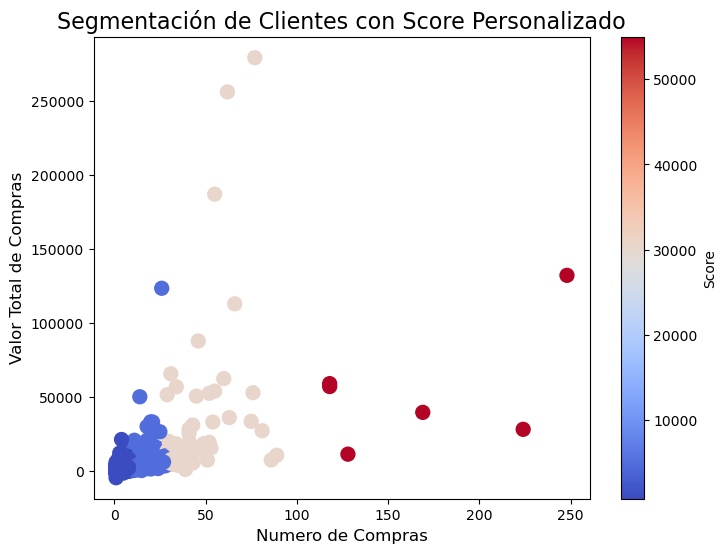

In [205]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['Numero_Compras'], df_final['Valor_Total_Compras'], c=df_final['Cluster_Score'], cmap='coolwarm', s=100)
plt.title('Segmentación de Clientes con Score Personalizado', fontsize=16)
plt.xlabel('Numero de Compras', fontsize=12)
plt.ylabel('Valor Total de Compras', fontsize=12)
plt.colorbar(label='Score')
plt.show()

In [207]:
cluster_means = df_final.groupby('Cluster_Frequency')[['Recency', 'Numero_Compras', 'Valor_Total_Compras']].mean()
print(cluster_means)

                      Recency  Numero_Compras  Valor_Total_Compras
Cluster_Frequency                                                 
0                  102.806391        2.816511           856.173567
1                   21.748614       14.036969          4835.863161
2                    0.500000      167.500000         54828.835000
3                    8.328571       43.071429         30263.038571


In [209]:
cluster_means['Score'] = cluster_means['Recency'] + cluster_means['Numero_Compras'] + cluster_means['Valor_Total_Compras']
print(cluster_means[['Score']])

                          Score
Cluster_Frequency              
0                    961.796470
1                   4871.648743
2                  54996.835000
3                  30314.438571


In [213]:
df_final['Cluster_Score'] = df_final['Cluster_Frequency'].map(cluster_means['Score'])
df_final[['CUSTOMER_ID', 'Recency', 'Numero_Compras', 'Valor_Total_Compras', 'Cluster_Frequency', 'Cluster_Score']].head()

,CUSTOMER_ID,Recency,Numero_Compras,Valor_Total_Compras,Cluster_Frequency,Cluster_Score
0,12346.0,326,2,0.00,0,961.79647
1,12347.0,1,7,4310.00,0,961.79647
2,12348.0,74,4,1797.24,0,961.79647
3,12349.0,18,1,1757.55,0,961.79647
4,12350.0,310,1,334.40,0,961.79647


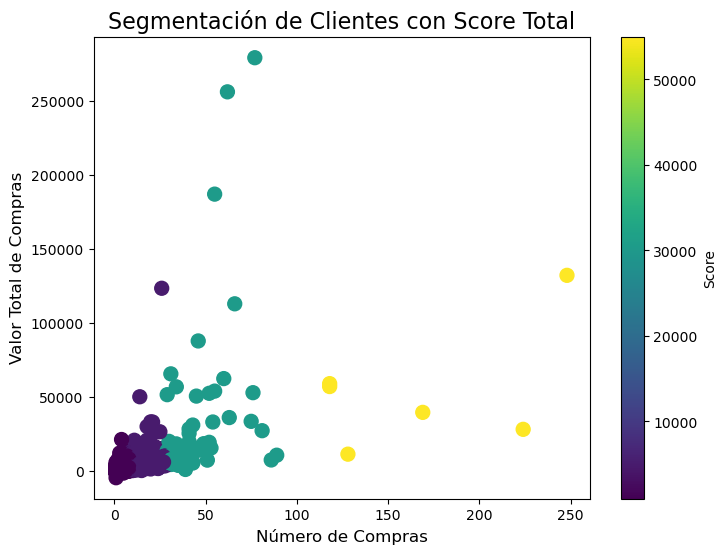

In [215]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['Numero_Compras'], df_final['Valor_Total_Compras'], c=df_final['Cluster_Score'], cmap='viridis', s=100)
plt.title('Segmentación de Clientes con Score Total', fontsize=16)
plt.xlabel('Número de Compras', fontsize=12)
plt.ylabel('Valor Total de Compras', fontsize=12)
plt.colorbar(label='Score')
plt.show()

In [217]:
cluster_averages = df_final.groupby('Cluster_Frequency')[['Recency', 'Numero_Compras', 'Valor_Total_Compras']].mean()
print(cluster_averages)

                      Recency  Numero_Compras  Valor_Total_Compras
Cluster_Frequency                                                 
0                  102.806391        2.816511           856.173567
1                   21.748614       14.036969          4835.863161
2                    0.500000      167.500000         54828.835000
3                    8.328571       43.071429         30263.038571


In [219]:
cluster_averages['Avg_Score'] = df_final.groupby('Cluster_Frequency')['Cluster_Score'].mean()
print(cluster_averages[['Recency', 'Numero_Compras', 'Valor_Total_Compras', 'Avg_Score']])

                      Recency  Numero_Compras  Valor_Total_Compras  \
Cluster_Frequency                                                    
0                  102.806391        2.816511           856.173567   
1                   21.748614       14.036969          4835.863161   
2                    0.500000      167.500000         54828.835000   
3                    8.328571       43.071429         30263.038571   

                      Avg_Score  
Cluster_Frequency                
0                    961.796470  
1                   4871.648743  
2                  54996.835000  
3                  30314.438571  


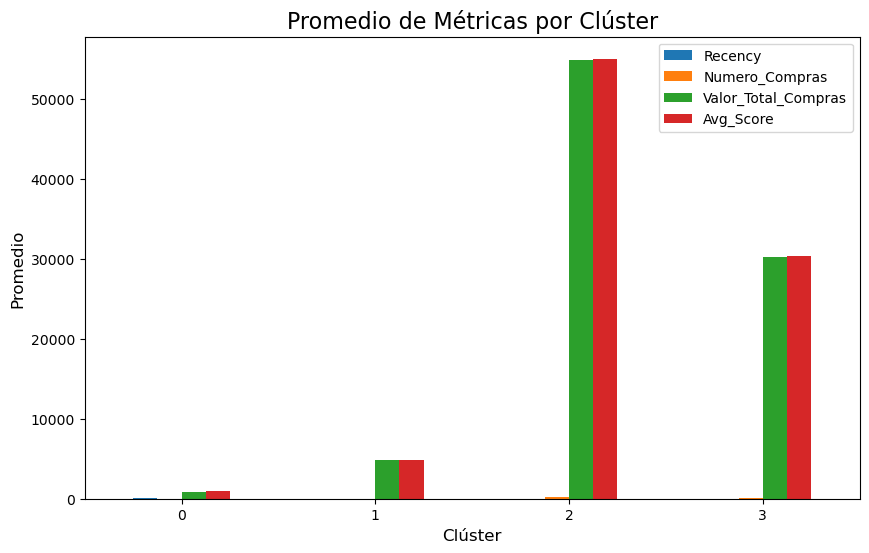

In [221]:
cluster_averages[['Recency', 'Numero_Compras', 'Valor_Total_Compras', 'Avg_Score']].plot(kind='bar', figsize=(10,6))
plt.title('Promedio de Métricas por Clúster', fontsize=16)
plt.xlabel('Clúster', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [227]:
def assign_value_category(score):
    if score <= 1:
        return 'Low-Value'
    elif 1 < score <= 4:
        return 'Average'
    elif 4 < score <= 6:
        return 'Potential'
    else:
        return 'High-Value'
df_final['Customer_Category'] = df_final['Cluster_Score'].apply(assign_value_category)
df_final[['CUSTOMER_ID', 'Cluster_Score', 'Customer_Category']].head()

,CUSTOMER_ID,Cluster_Score,Customer_Category
0,12346.0,961.79647,High-Value
1,12347.0,961.79647,High-Value
2,12348.0,961.79647,High-Value
3,12349.0,961.79647,High-Value
4,12350.0,961.79647,High-Value


In [237]:
def assign_value_category(score):
    if score <= 1:
        return 'Low-Value'
    elif 1 < score <= 4:
        return 'Average'
    elif 4 < score <= 6:
        return 'Potential'
    else:
        return 'High-Value'

df_final['Customer_Category'] = df_final['Cluster_Score'].apply(assign_value_category)
df_final[['CUSTOMER_ID', 'Cluster_Score', 'Customer_Category']].head()

,CUSTOMER_ID,Cluster_Score,Customer_Category
0,12346.0,961.79647,High-Value
1,12347.0,961.79647,High-Value
2,12348.0,961.79647,High-Value
3,12349.0,961.79647,High-Value
4,12350.0,961.79647,High-Value


In [241]:
df_final.head(10)

,CUSTOMER_ID,Ultima_Compra,Numero_Compras,Recency,Valor_Total_Compras,Cluster,Cluster_Frequency,Cluster_Monetary,Cluster_Score,Customer_Category
0,12346.0,2020-01-18 10:17:00,2,326,0.00,0,0,0,961.796470,High-Value
1,12347.0,2020-12-07 15:52:00,7,1,4310.00,2,0,0,961.796470,High-Value
2,12348.0,2020-09-25 13:13:00,4,74,1797.24,2,0,0,961.796470,High-Value
3,12349.0,2020-11-21 09:51:00,1,18,1757.55,2,0,0,961.796470,High-Value
4,12350.0,2020-02-02 16:01:00,1,310,334.40,0,0,0,961.796470,High-Value
5,12352.0,2020-11-03 14:37:00,11,35,1545.41,2,1,0,4871.648743,High-Value
6,12353.0,2020-05-19 17:47:00,1,203,89.00,0,0,0,961.796470,High-Value
7,12354.0,2020-04-21 13:11:00,1,231,1079.40,0,0,0,961.796470,High-Value
8,12355.0,2020-05-09 13:49:00,1,213,459.40,0,0,0,961.796470,High-Value
9,12356.0,2020-11-17 08:40:00,3,22,2811.43,2,0,0,961.796470,High-Value


In [247]:
total_por_segmento = df_final['Customer_Category'].value_counts()
proporcion_por_segmento = df_final['Customer_Category'].value_counts(normalize=True)
print("Total de clientes por segmento:")
print(total_por_segmento)

Total de clientes por segmento:
Customer_Category
High-Value    4372
Name: count, dtype: int64


In [245]:
print("\nProporción de clientes por segmento:")
print(proporcion_por_segmento)


Proporción de clientes por segmento:
Customer_Category
High-Value    1.0
Name: proportion, dtype: float64


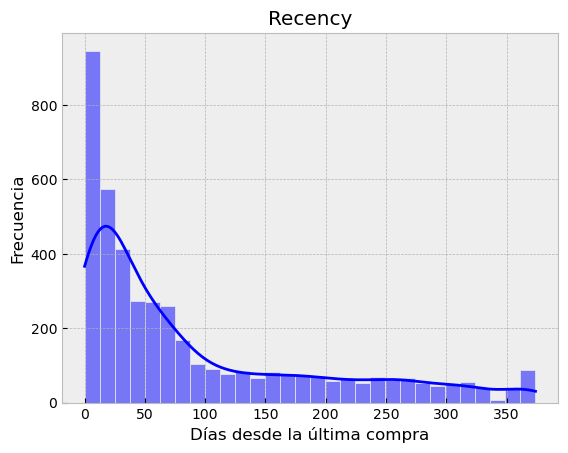

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.histplot(df_final['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency')
plt.xlabel('Días desde la última compra')
plt.ylabel('Frecuencia')
plt.show()

In [255]:
df_filtered = df_final[df_final['Recency'] < 4000]
df_filtered.head()

,CUSTOMER_ID,Ultima_Compra,Numero_Compras,Recency,Valor_Total_Compras,Cluster,Cluster_Frequency,Cluster_Monetary,Cluster_Score,Customer_Category
0,12346.0,2020-01-18 10:17:00,2,326,0.00,0,0,0,961.79647,High-Value
1,12347.0,2020-12-07 15:52:00,7,1,4310.00,2,0,0,961.79647,High-Value
2,12348.0,2020-09-25 13:13:00,4,74,1797.24,2,0,0,961.79647,High-Value
3,12349.0,2020-11-21 09:51:00,1,18,1757.55,2,0,0,961.79647,High-Value
4,12350.0,2020-02-02 16:01:00,1,310,334.40,0,0,0,961.79647,High-Value


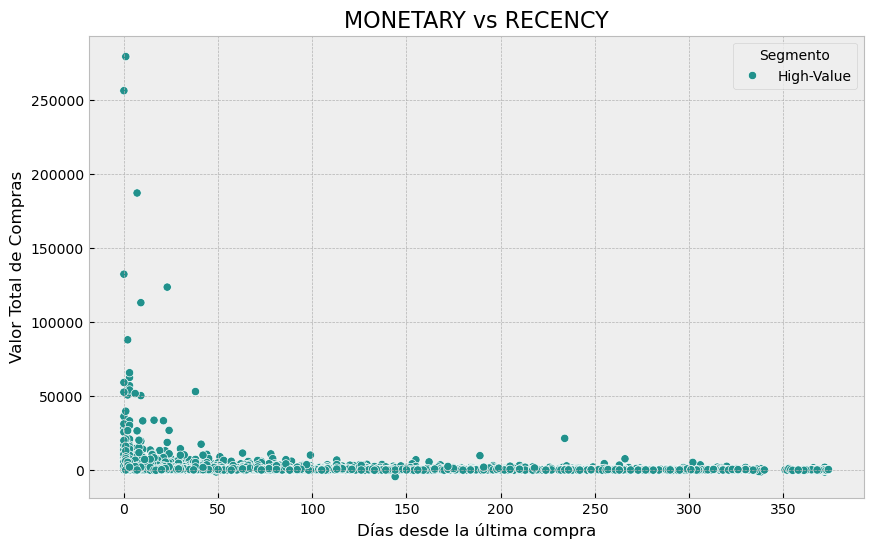

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Recency', y='Valor_Total_Compras', hue='Customer_Category', palette='viridis')
plt.title('MONETARY vs RECENCY', fontsize=16)
plt.xlabel('Días desde la última compra', fontsize=12)
plt.ylabel('Valor Total de Compras', fontsize=12)
plt.legend(title='Segmento', loc='upper right')
plt.show()

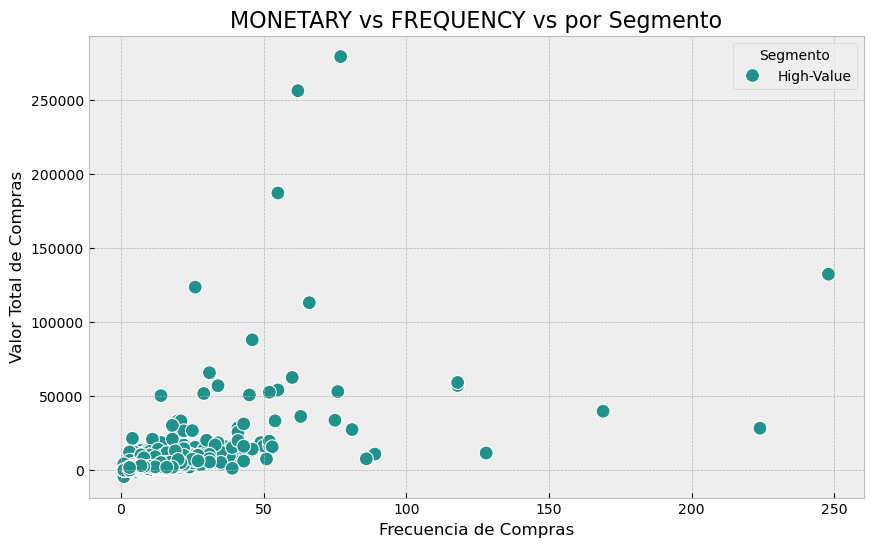

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Numero_Compras', y='Valor_Total_Compras', hue='Customer_Category', palette='viridis', s=100, edgecolor='w')
plt.title('MONETARY vs FREQUENCY vs por Segmento', fontsize=16)
plt.xlabel('Frecuencia de Compras', fontsize=12)
plt.ylabel('Valor Total de Compras', fontsize=12)
plt.legend(title='Segmento', loc='upper right')
plt.show()